# Explorartory Data Analysis

In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt



# import .csv file as a pandas dataframe

In [4]:
df = pd.read_csv('data\Student Performance new.csv')
df.drop('Unnamed: 0',axis=1,inplace = True)

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\PMLS\AppData\Local\Temp\ipykernel_102000\98796333.py:1: SyntaxWarning: invalid escape sequence '\S'
  df = pd.read_csv('data\Student Performance new.csv')


# Showing top 5 rows

In [5]:
df.head()

,race/ethnicity,parental level of education,lunch,test preparation course,math percentage,reading score percentage,writing score percentage,sex
0,group B,bachelor's degree,standard,none,0.72,0.72,0.74,F
1,group C,some college,standard,completed,0.69,0.90,0.88,F
2,group B,master's degree,standard,none,0.90,0.95,0.93,F
3,group A,associate's degree,free/reduced,none,0.47,0.57,0.44,M
4,group C,some college,standard,none,0.76,0.78,0.75,M


# Shape of data

In [6]:
df.shape

(1000, 8)

# Check Missing Values

In [7]:
df.isnull().sum()

race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math percentage                0
reading score percentage       0
writing score percentage       0
sex                            0
dtype: int64

There is no NULL value in a dataset.

# Check Duplicate Values

In [8]:
df.duplicated().sum()

np.int64(0)

There is no duplicates in dataset

# Check Data Type

In [9]:
# it will show the data types and null values in every column of a dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   race/ethnicity               1000 non-null   object 
 1   parental level of education  1000 non-null   object 
 2   lunch                        1000 non-null   object 
 3   test preparation course      1000 non-null   object 
 4   math percentage              1000 non-null   float64
 5   reading score percentage     1000 non-null   float64
 6   writing score percentage     1000 non-null   float64
 7   sex                          1000 non-null   object 
dtypes: float64(3), object(5)
memory usage: 62.6+ KB


# Number of Unique Values in each column

In [11]:
df.nunique()

race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math percentage                81
reading score percentage       72
writing score percentage       77
sex                             2
dtype: int64

# Statistics of data

In [12]:
df.describe()

,math percentage,reading score percentage,writing score percentage
count,1000.000000,1000.000000,1000.000000
mean,0.660890,0.691690,0.680540
std,0.151631,0.146002,0.151957
min,0.000000,0.170000,0.100000
25%,0.570000,0.590000,0.577500
50%,0.660000,0.700000,0.690000
75%,0.770000,0.790000,0.790000
max,1.000000,1.000000,1.000000


### Insights
###### --> All means are very close to each other.
###### --> All the standard  deviations are close to each other.
###### --> For math minimum percentage is 0 , for reading score minimum percentage is 0.17 and for writing score minimum   percentage is 0.1

# Exploring Data

In [5]:
print("Categories in 'race/ethnicity' column: ",end =" ")
print(df["race/ethnicity"].unique())

print("Categories in 'lunch' column: ",end =" ")
print(df["lunch"].unique())

print("Categories in 'test preparation course' column: ",end =" ")
print(df["test preparation course"].unique())

print("Categories in 'sex' column: ",end =" ")
print(df["sex"].unique())

print("Categories in 'parental level of education' column: ",end =" ")
print(df["parental level of education"].unique())

Categories in 'race/ethnicity' column:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'lunch' column:  ['standard' 'free/reduced']
Categories in 'test preparation course' column:  ['none' 'completed']
Categories in 'sex' column:  ['F' 'M']
Categories in 'parental level of education' column:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


In [6]:
#finding Numeric and categorical Features:
numeric_features=[]
categorical_features=[]
for features in df.columns:
    if df[features].dtype !='O':
        numeric_features.append(features)
    else:
        categorical_features.append(features)

print("Numeric features: ", end =" ")
print(numeric_features)
print("Categorical features: ", end =" ")
print(categorical_features)



Numeric features:  ['math percentage', 'reading score percentage', 'writing score percentage']
Categorical features:  ['race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'sex']


# Adding column for "Total percentage"

In [7]:
df["total percentage"] = (df["math percentage"] + df["reading score percentage"] + df["writing score percentage"])/300*100
df.head()

,race/ethnicity,parental level of education,lunch,test preparation course,math percentage,reading score percentage,writing score percentage,sex,total percentage
0,group B,bachelor's degree,standard,none,0.72,0.72,0.74,F,0.726667
1,group C,some college,standard,completed,0.69,0.90,0.88,F,0.823333
2,group B,master's degree,standard,none,0.90,0.95,0.93,F,0.926667
3,group A,associate's degree,free/reduced,none,0.47,0.57,0.44,M,0.493333
4,group C,some college,standard,none,0.76,0.78,0.75,M,0.763333


# Full Marks

In [119]:
math_full = (df["math percentage"] == 1.0).sum()
read_full = (df["reading score percentage"] == 1.0).sum()
write_full = (df["writing score percentage"] == 1.0).sum()
print(f"Number of students score full marks in math : {math_full}")
print(f"Number of students score full marks in reading : {read_full}")
print(f"Number of students score full marks in writing : {write_full}")



Number of students score full marks in math : 7
Number of students score full marks in reading : 17
Number of students score full marks in writing : 14


# Percentages below ar equal to 20

In [121]:
math = (df["math percentage"] <= 0.20).sum()
read = (df["reading score percentage"] <= 0.20).sum()
write = (df["writing score percentage"] <= 0.20).sum()
print(f"Number of students score less than 20% in math : {math}")
print(f"Number of students score less than 20% in reading : {read}")
print(f"Number of students score less than 20% in writing : {write}")

Number of students score less than 20% in math : 4
Number of students score less than 20% in reading : 1
Number of students score less than 20% in writing : 3


# Univariate Analysis

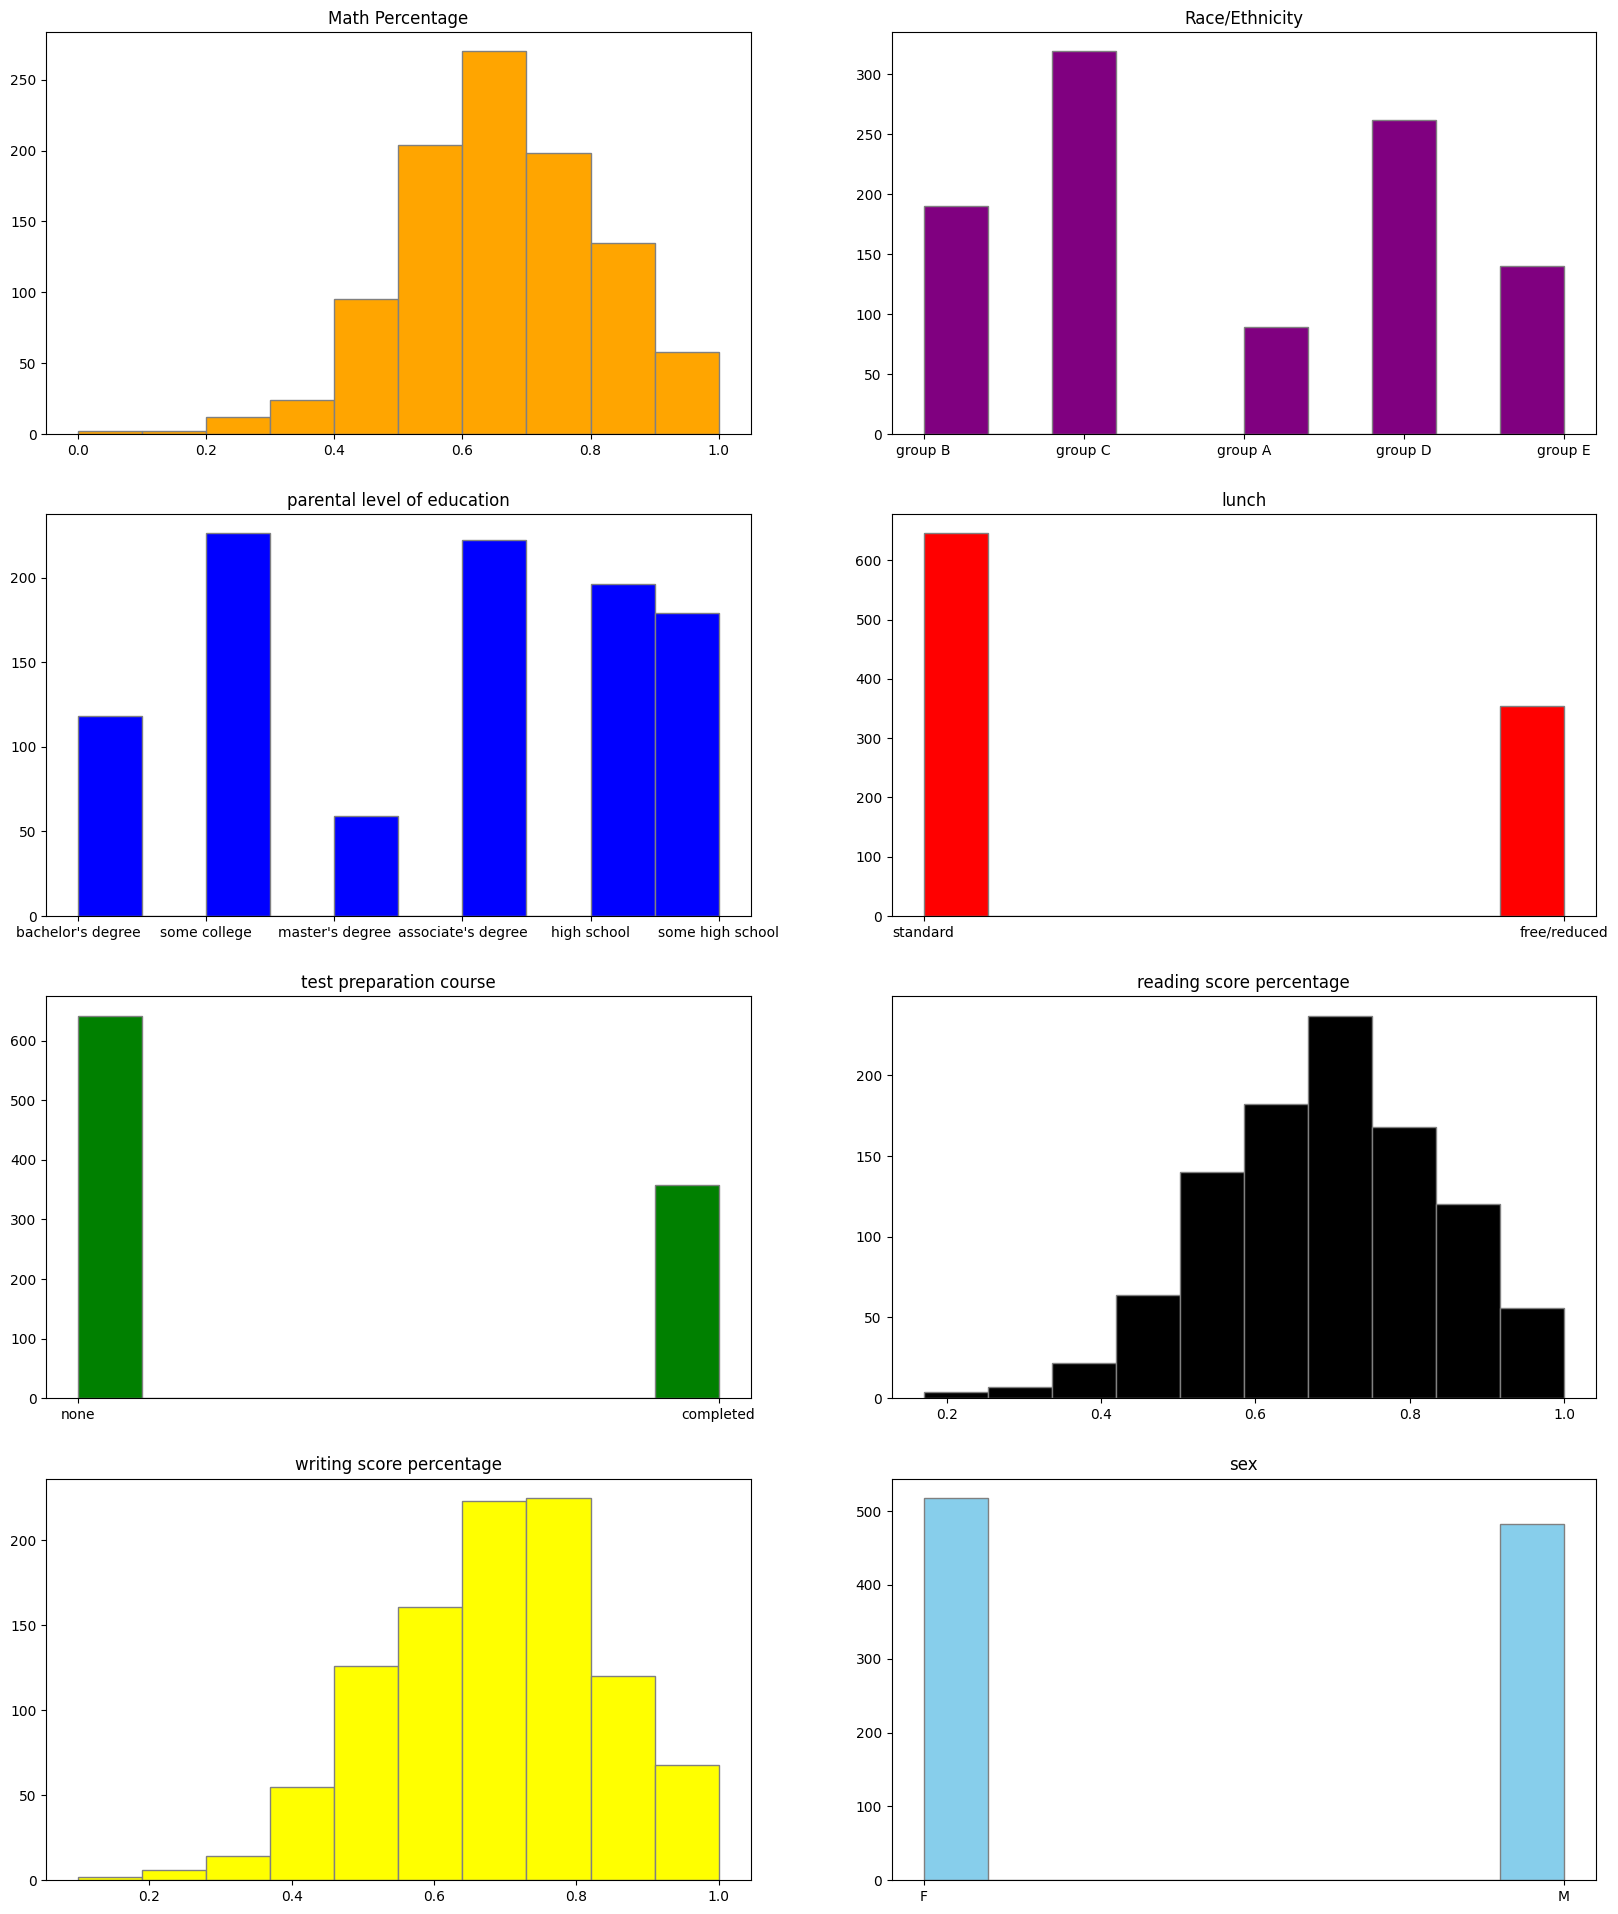

In [ ]:
fig,axes=plt.subplots(4,2,figsize=(20,24))
axes[0,0].hist(df["math percentage"],color="orange",edgecolor='grey')
axes[0,0].set_title("Math Percentage")
axes[0,1].hist(df["race/ethnicity"],color="purple",edgecolor='grey')
axes[0,1].set_title("Race/Ethnicity")
axes[1,0].hist(df["parental level of education"],color='blue',edgecolor='grey')
axes[1,0].set_title("parental level of education")
axes[1,1].hist(df["lunch"],color='red',edgecolor='grey')
axes[1,1].set_title("lunch")
axes[2,0].hist(df["test preparation course"],color='green',edgecolor='grey')
axes[2,0].set_title("test preparation course")
axes[2,1].hist(df["reading score percentage"],color='black',edgecolor='grey')
axes[2,1].set_title("reading score percentage")
axes[3,0].hist(df["writing score percentage"],color='yellow',edgecolor='grey')
axes[3,0].set_title("writing score percentage")
axes[3,1].hist(df["sex"],color='skyblue',edgecolor='grey')
axes[3,1].set_title("sex")
plt.show()



# Bivariate Analysis

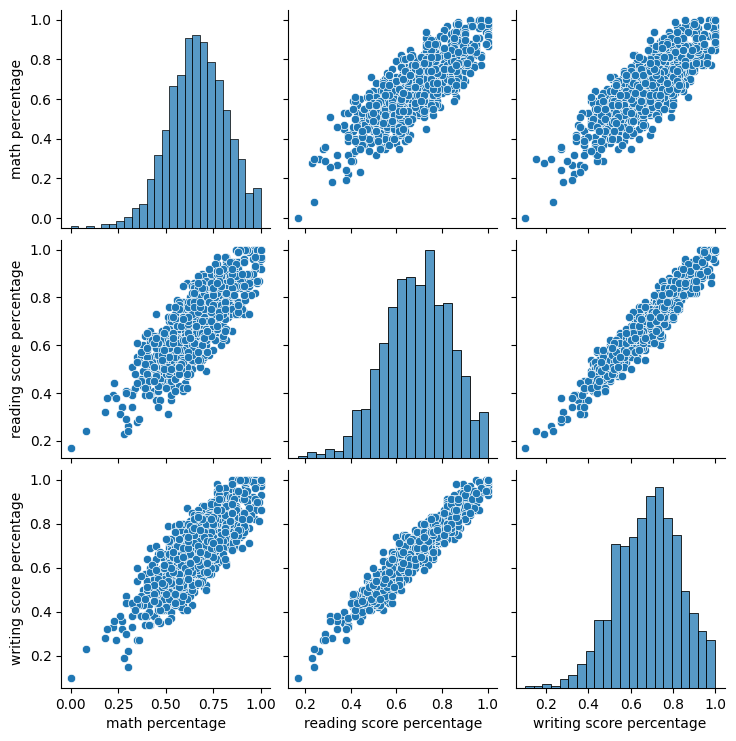

In [75]:
sns.pairplot(df)

# Total Percentages vs gender

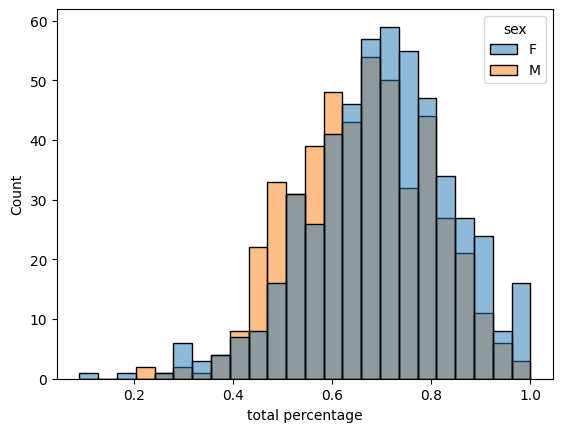

In [126]:
sns.histplot(x='total percentage', hue='sex' ,data=df)
plt.show()

Females performed better

# Parental level of education vs total percentages

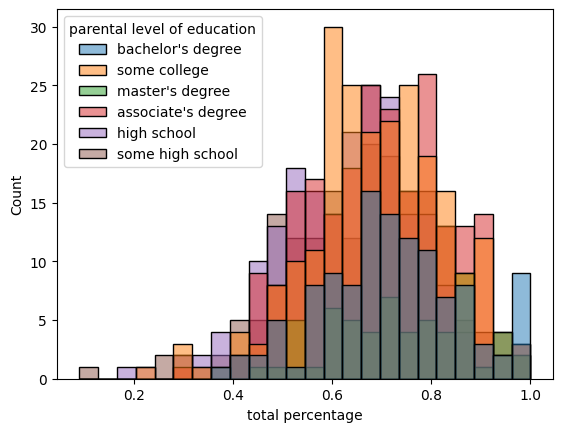

In [8]:
sns.histplot(x='total percentage', hue='parental level of education' ,data=df)
plt.show()

Parental Level of education = some college --> performed better

# race/ethnicity vs total percentages

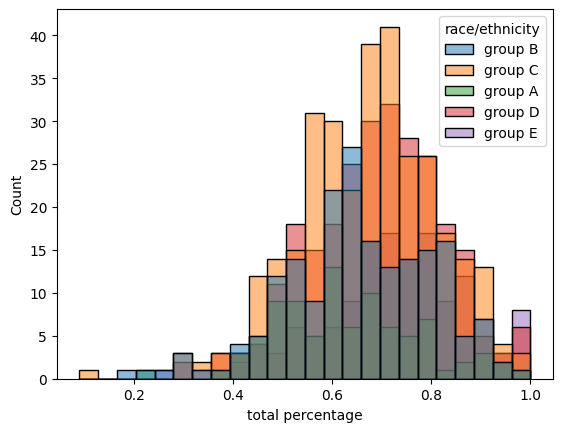

In [9]:
sns.histplot(x='total percentage', hue='race/ethnicity' ,data=df)
plt.show()

Students belong to group C performed better

# test preparation course vs total percentage

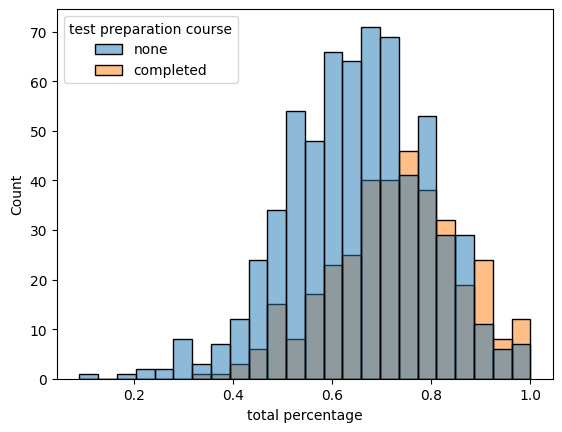

In [10]:
sns.histplot(x='total percentage', hue='test preparation course' ,data=df)
plt.show()

Students who did not complete test prepration course performed better

# Outliers Detection

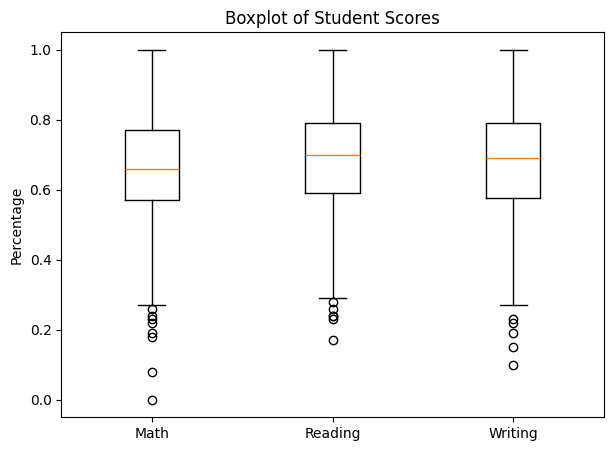

In [24]:
plt.figure(figsize=(7,5))
plt.boxplot([df["math percentage"],df["reading score percentage"] ,df["writing score percentage"]])
plt.xticks([1, 2, 3], ["Math", "Reading", "Writing"])
plt.ylabel("Percentage")
plt.title("Boxplot of Student Scores")
plt.show()
